# DATA 365 SQL Projects

<b/>Project 1: Calculating Free-to-Paid Conversion Rate with SQL </b>

The project is designed to use SQL skills to estimate the free-to-paid conversion rates among students on the platform.  Though working through the data, key metrics such as the rate of students who purchased a subscription following engaging with course content was analyzed.  The project involves extracting and manipulating data from the three tables provided containing information about registration dates, engagement dates, and subscription purchases. The goal is to gain insights into user behavior to inform strategic decisions for the platform.   

<b/>Project 2: Student Streaks Analysis with SQL </b>

This project focuses on user engagement patterns through streak analysis.  Using SQL to process the data, the most engaged students were identified by exploring the learning streaks on the platform.  In gaining insights into user engagement, consistency, and dedication, top students would be identified.  This allows them to be contacted for testimonials and feedback.  That information is used to enhance product features, addressing user preferences, and guiding other improvements towards the learning experience.   

 

In [1]:
#all libraries needed for the project

import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
import seaborn as sns


## Project 1: Converstion Rates

<b>Description:<b/>

This project, undertaken by Data 365, involves the analysis of a comprehensive dataset encompassing student information, engagement metrics, and purchasing behavior. The primary objective is to address the following key questions:

- What is the free-to-paid conversion rate among students who have watched a lecture on the 365 platform?
- What is the average duration between the registration date and a student's first lecture engagement?
- What is the average duration between the first-time engagement and a student's initial subscription purchase?
- How can we interpret these results, and what are their implications?

<b/>Data Processing:<b/>

The dataset was imported into MySQL for thorough processing and analysis. The process involved crafting a query that combines existing tables, incorporating joins with student engagement on student ID, and employing a left join with student purchase. Additional fields were calculated to determine the first date a student watched a lecture, the first date of purchase, and the time differences between key events.

The query underwent rigorous inspection to identify and rectify any errors. It served as the basis for a subquery, facilitating the computation of essential metrics:

- <b>Conversion Rate:</b> Calculated as the ratio of counts of first-time purchases to first-time engagements.
- <b>Average Days Between Registration and Watching:</b> Obtained by summing the date differences from registration to the first lecture and dividing by the count of first-time engagements.
- <b>Average Days Between Watching and Purchase:</b> Computed by summing the date differences from watching to the first purchase and dividing by the count of first-time purchases.

The results of these queries were exported here for further analysis and visualization, allowing for a comprehensive interpretation of the findings.



In [3]:
# importing csv for project 1: Converstion Rates

con_rate_df = pd.read_csv('Con_Rate_calculating_conversion_rate.csv')

# inspecting data frame

con_rate_df

,engagement_student_id,date_registered,first_date_watched,first_date_purchased,date_diff_reg_watch,date_diff_watch_purchase,conversion_rate
0,255193,2021-12-01,2021-12-01,NaN,0,0,0.0
1,255194,2021-12-01,2021-12-01,NaN,0,0,0.0
2,255198,2021-12-01,2022-02-17,NaN,78,0,0.0
3,255199,2021-12-01,2021-12-01,NaN,0,0,0.0
4,255200,2021-12-01,2021-12-01,NaN,0,0,0.0
...,...,...,...,...,...,...,...
20250,296916,2022-10-30,2022-10-30,NaN,0,0,0.0
20251,296918,2022-10-30,2022-10-30,NaN,0,0,0.0
20252,296922,2022-10-30,2022-10-30,NaN,0,0,0.0
20253,296926,2022-10-30,2022-10-30,NaN,0,0,0.0


### Ratio of first-time purchases to first-time-engagement

Calculating the ratio of first-time purchases to initial user engagements, examining user behavior and conversion dynamics.

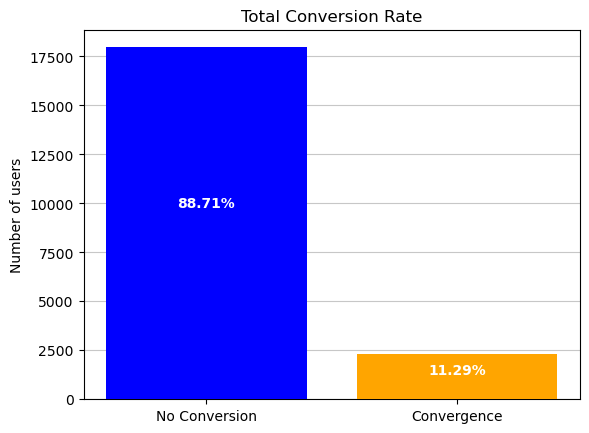

In [114]:
# total count of 0 and 1 in conversion rate
total_count = con_rate_df.shape[0]
count_0 = con_rate_df[con_rate_df['conversion_rate'] == 0.0].shape[0]
count_1 = con_rate_df[con_rate_df['conversion_rate'] == 1.0].shape[0]

# Calculating percentages of conversion rate
percentage_0 = count_0 / total_count * 100
percentage_1 = count_1 / total_count * 100

# Creating a DataFrame 
plot_data = pd.DataFrame({
    'Conversion': ['No Conversion', 'Convergence'],
    'Count': [count_0, count_1],
    'Percentage': [percentage_0, percentage_1]
})

# Plot single stacked bar chart
fig, ax = plt.subplots()

# Plot the bars
bar_width = 0.8
bar_0 = ax.bar(plot_data['Conversion'], plot_data['Count'], width=bar_width, color=['blue', 'orange'],zorder=3, clip_path=None)

# grid lines 
ax.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)

#labels and legend
ax.set_ylabel('Number of users')
ax.set_title('Total Conversion Rate')
# Annotate False value
plt.annotate(f'{percentage_0:.2f}%', 
             xy=(0, percentage_0 / 4),  # Adjusted y-coordinate for vertical alignment
             xytext=(0, 10000), 
             ha='center', 
             va='center',
             color='white',  
             fontweight='bold')

# Annotate True value
plt.annotate(f'{percentage_1:.2f}%', 
             xy=(1, percentage_1 / 2),  # Adjusted x-coordinate 
             xytext=(1, 1500), 
             ha='center', 
             va='center',
             color='white',  
             fontweight='bold')


# Save the plot as a PNG file
plt.savefig('conversion_rate_chart.png', bbox_inches='tight')

# Show the plot
plt.show()


<b/>First Result: Free-to-Paid Conversion Rate</b>

From analyzing the dataset, it was observed that approximately <b/>11.29%</b> of users successfully transitioned from watching the educational material to purchasing a subscription. This conversion rate provides valuable insights into user engagement and highlights the effectiveness of the platform in converting viewers into paying subscribers.   

<b/>Next Step: Data Prep for Additional Visualization </b>

additional columns were added, and calculations were performed for other visualizations.  The focus is on monthly conversion rates, where visualizations will look for trends and patterns in user engagement and subscription conversions.

In [60]:
# Converting date columns to datetime objects
con_rate_df['date_registered'] = pd.to_datetime(con_rate_df['date_registered'])
con_rate_df['first_date_purchased'] = pd.to_datetime(con_rate_df['first_date_purchased'])
con_rate_df['first_date_watched'] = pd.to_datetime(con_rate_df['first_date_watched'])

# Extract year and month from date columns
con_rate_df['month_year_purchased'] = con_rate_df['first_date_purchased'].dt.to_period('M')
con_rate_df['month_year_watched'] = con_rate_df['first_date_watched'].dt.to_period('M')
con_rate_df['month_year_registered'] = con_rate_df['date_registered'].dt.to_period('M')

# Count the number of students for each combination of registration, purchase, and watch month
counts_purchased = con_rate_df.groupby('month_year_purchased').size().reset_index(name='first_purchased_count')
counts_registered = con_rate_df.groupby('month_year_registered').size().reset_index(name='first_registered_count')
counts_watched = con_rate_df.groupby('month_year_watched').size().reset_index(name='first_watched_count')

# Merge the counts into a single DataFrame
merged_counts = counts_registered.merge(counts_purchased, how='outer', left_on='month_year_registered', right_on='month_year_purchased')
merged_counts = merged_counts.merge(counts_watched, how='outer', left_on='month_year_registered', right_on='month_year_watched')

# Fill NaN values with 0
merged_counts = merged_counts.fillna(0)

# Display the final DataFrame

merged_counts


,month_year_registered,first_registered_count,month_year_purchased,first_purchased_count,month_year_watched,first_watched_count
0,2021-12,1639.0,2021-12,124,2021-12,1528.0
1,2022-01,1751.0,2022-01,231,2022-01,1710.0
2,2022-02,1587.0,2022-02,157,2022-02,1527.0
3,2022-03,1768.0,2022-03,231,2022-03,1757.0
4,2022-04,1516.0,2022-04,161,2022-04,1477.0
5,2022-05,1454.0,2022-05,196,2022-05,1451.0
6,2022-06,1892.0,2022-06,170,2022-06,1848.0
7,2022-07,1596.0,2022-07,245,2022-07,1573.0
8,2022-08,2632.0,2022-08,159,2022-08,2771.0
9,2022-09,1875.0,2022-09,226,2022-09,1937.0


In [11]:
# Converting date columns to datetime objects
con_rate_df['first_date_purchased'] = pd.to_datetime(con_rate_df['first_date_purchased'])
con_rate_df['first_date_watched'] = pd.to_datetime(con_rate_df['first_date_watched'])

# Extract month from date columns
con_rate_df['month_purchased'] = con_rate_df['first_date_purchased'].dt.to_period('M')
con_rate_df['month_watched'] = con_rate_df['first_date_watched'].dt.to_period('M')

# Count the number of students for each combination of registration, purchase, and watch month
counts = con_rate_df.groupby(['month_purchased', 'month_watched']).size().reset_index(name='student_count')

counts


,month_purchased,month_watched,student_count
0,2021-12,2021-12,124
1,2022-01,2021-12,15
2,2022-01,2022-01,216
3,2022-02,2021-12,4
4,2022-02,2022-01,12
...,...,...,...
117,2023-08,2022-01,1
118,2023-08,2022-04,1
119,2023-08,2022-06,1
120,2023-08,2022-08,2


In [59]:
# Creating 'total_data' with relevant columns
total_data = pd.DataFrame({
    'month_year_registered': merged_counts['month_year_registered'],
    'first_registered_count': merged_counts['first_registered_count'],
    'month_year_purchased': merged_counts['month_year_purchased'],
    'first_purchased_count': merged_counts['first_purchased_count'],
    'month_year_watched': merged_counts['month_year_watched'],
    'first_watched_count': merged_counts['first_watched_count'],
    'Total_Purchases': merged_counts['first_purchased_count'],
    'Total_First_Watches': merged_counts['first_watched_count']
})

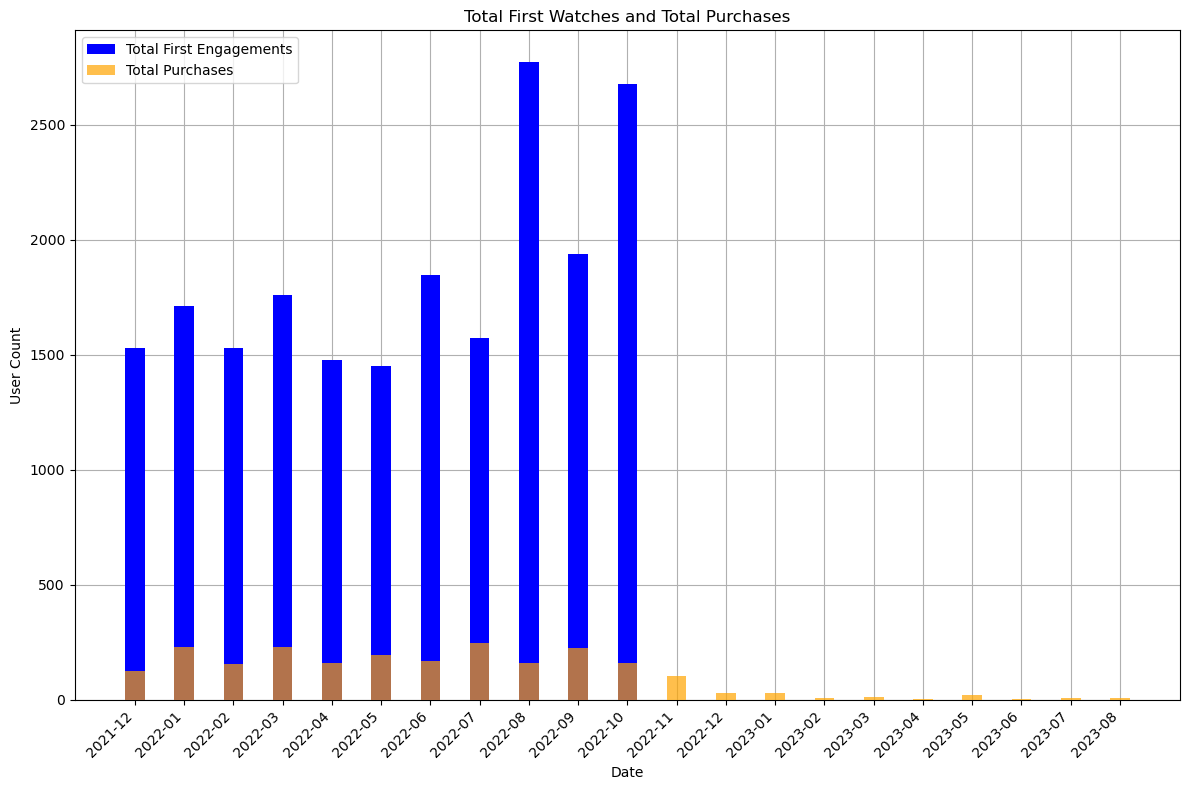

In [81]:
# Drop rows with NaN values
total_data = total_data.dropna(subset=['Total_Purchases', 'Total_First_Watches'])

# Converting 'month_year_purchased' column to string
total_data['month_year_purchased'] = total_data['month_year_purchased'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.4

# total first watches
plt.bar(total_data['month_year_purchased'], total_data['Total_First_Watches'], width=bar_width, label='Total First Engagements', color='blue',zorder=5)

# total purchases
plt.bar(total_data['month_year_purchased'], total_data['Total_Purchases'], width=bar_width, label='Total Purchases', color='orange', alpha=0.7,zorder=5)

plt.xlabel('Date')
plt.ylabel('User Count')
plt.title('Total First Watches and Total Purchases')
plt.legend(loc='upper left')
plt.grid(True) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Looking at first-time engagement patterns throughout the year revealed spikes in August and October, these were significantly higher registration numbers compared to other months. As well, elevated purchase figures were observed in the months of January, March, July, and September. It is noteworthy to investigate the factors contributing to these spikes

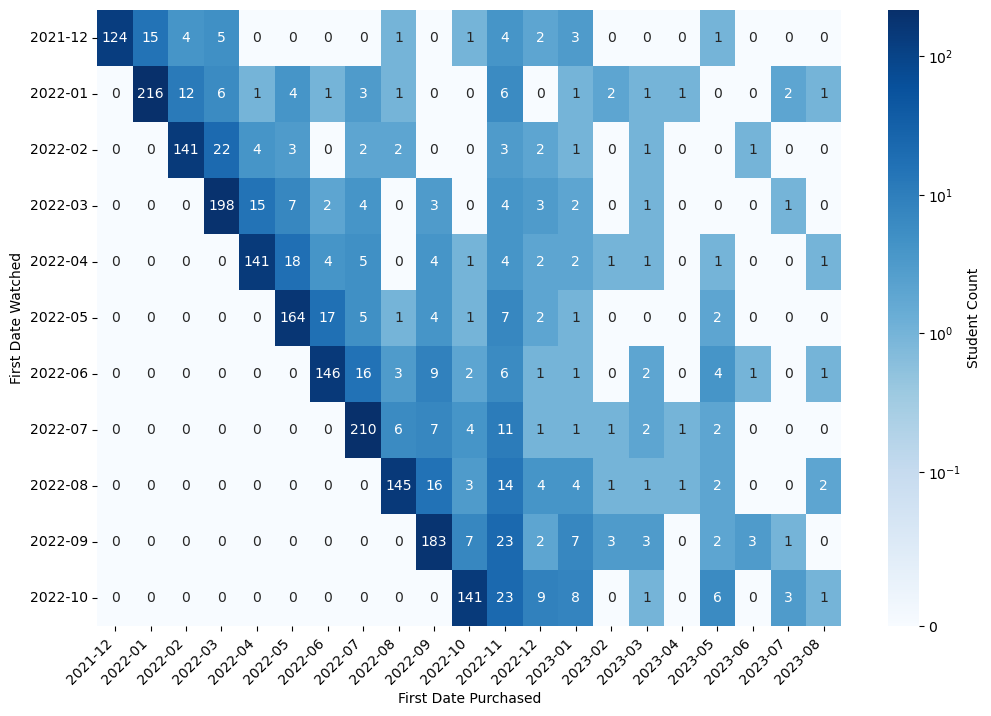

In [14]:
# Creating a pivot table for counts
pivot_counts = con_rate_df.pivot_table(index='month_year_watched', columns='month_year_purchased', values='engagement_student_id', aggfunc='count', fill_value=0)

# Creating a heatmap with annotations and adjust color darkness using SymLogNorm
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_counts, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar_kws={'label': 'Student Count'}, 
    norm=mcolors.SymLogNorm(linthresh=0.1, vmin=pivot_counts.values.min(), vmax=pivot_counts.values.max())
)

# x-axis and y-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('First Date Purchased')
plt.ylabel('First Date Watched')


# Show the plot
plt.show()


The heat map examines patterns of outliers where first-time engagement and purchasing do not align within the same month. Certain months exhibit higher purchase numbers seemingly independent of the month of first engagement. Exploring events or circumstances occurring during those specific months could provide valuable insights.

### Average Time Intervals: Registration to Watching and Watching to Purchase

Looking to answer these questions about user engagement and conversion: 

- What is the average duration between the registration date and when a student has watched a lecture for the first time (date of first-time engagement)? 

- What is the average duration between the date of first-time engagement and when a student purchases a subscription for the first time (date of first-time purchase)? 

Looking at these time intervals, we can gain insights about user journey, allowing us to optimize strategies and enhance the overall user experience.

In [85]:
# Filter out rows where 'first_date_purchased' is not null and create a copy
filtered_df = con_rate_df[con_rate_df['first_date_purchased'].notna()].copy()

# Calculating date difference
filtered_df['date_diff_watch_purchase'] = ( filtered_df['first_date_purchased'] - filtered_df['first_date_watched']).dt.days

# calculating values
max_value = filtered_df['date_diff_watch_purchase'].max()
min_value = filtered_df['date_diff_watch_purchase'].min()
mean_value = filtered_df['date_diff_watch_purchase'].mean()
median_value = filtered_df['date_diff_watch_purchase'].median()
mode_value = filtered_df['date_diff_watch_purchase'].mode().iloc[0]


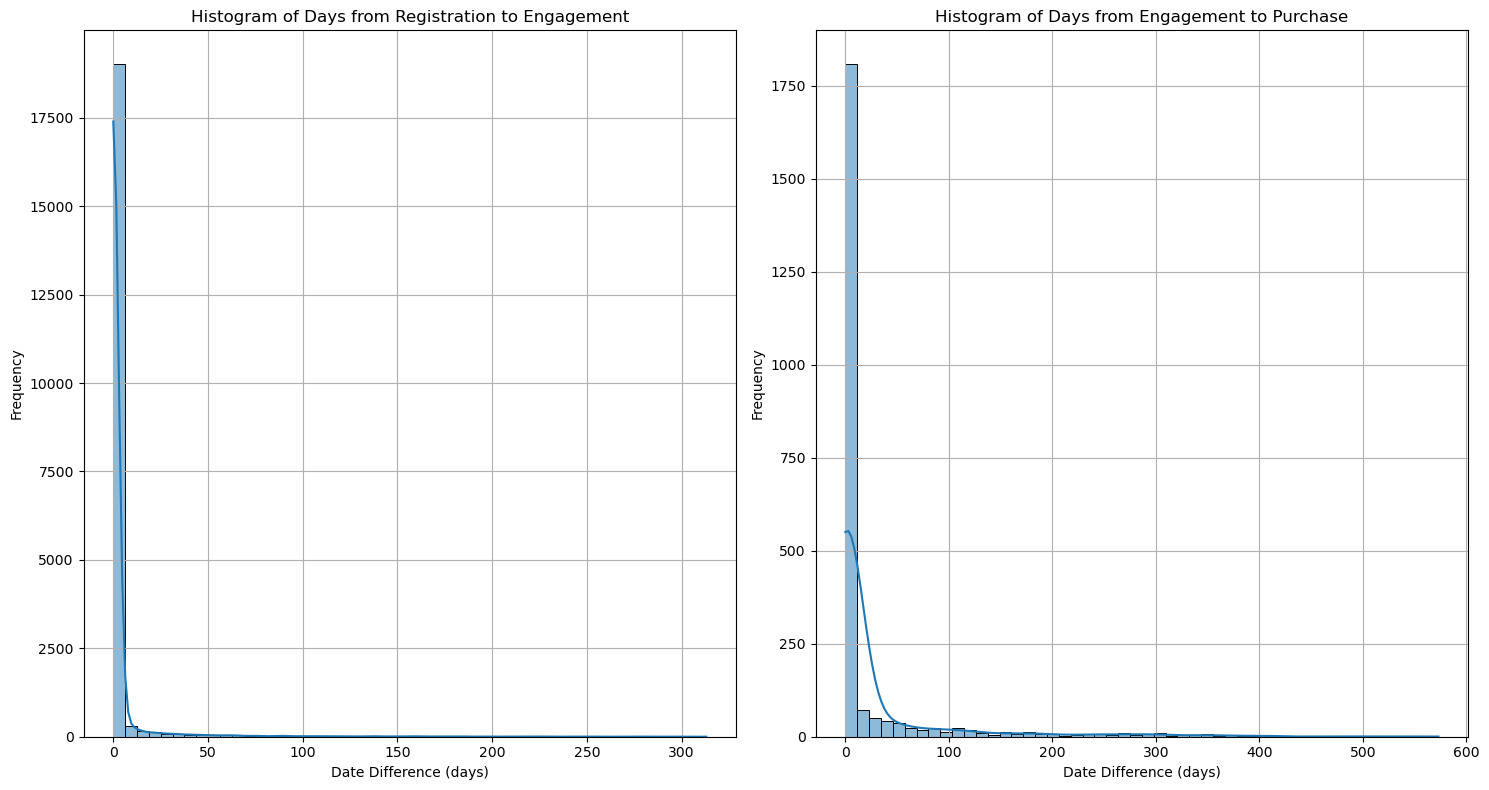

In [113]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# histogram for date_diff_reg_watch
sns.histplot(con_rate_df['date_diff_reg_watch'], bins=50, edgecolor='black', kde=True, ax=axs[0])
axs[0].set_title('Histogram of Days from Registration to Engagement')
axs[0].set_xlabel('Date Difference (days)')
axs[0].set_ylabel('Frequency')
axs[0].grid()

# histogram for date_diff_watch_purchase
sns.histplot(filtered_df['date_diff_watch_purchase'], bins=50, edgecolor='black', kde=True, ax=axs[1])
axs[1].set_title('Histogram of Days from Engagement to Purchase')
axs[1].set_xlabel('Date Difference (days)')
axs[1].set_ylabel('Frequency')
axs[1].grid()

# Adjust layout
plt.tight_layout()

# Save the subplots as a PNG file
plt.savefig('histograms_subplots.png', bbox_inches='tight')

# Show the subplots
plt.show()


Looking at the average duration between registration and first time watching was 3.42 days and for the average duration between engagement and purchase was 26.24 days.  

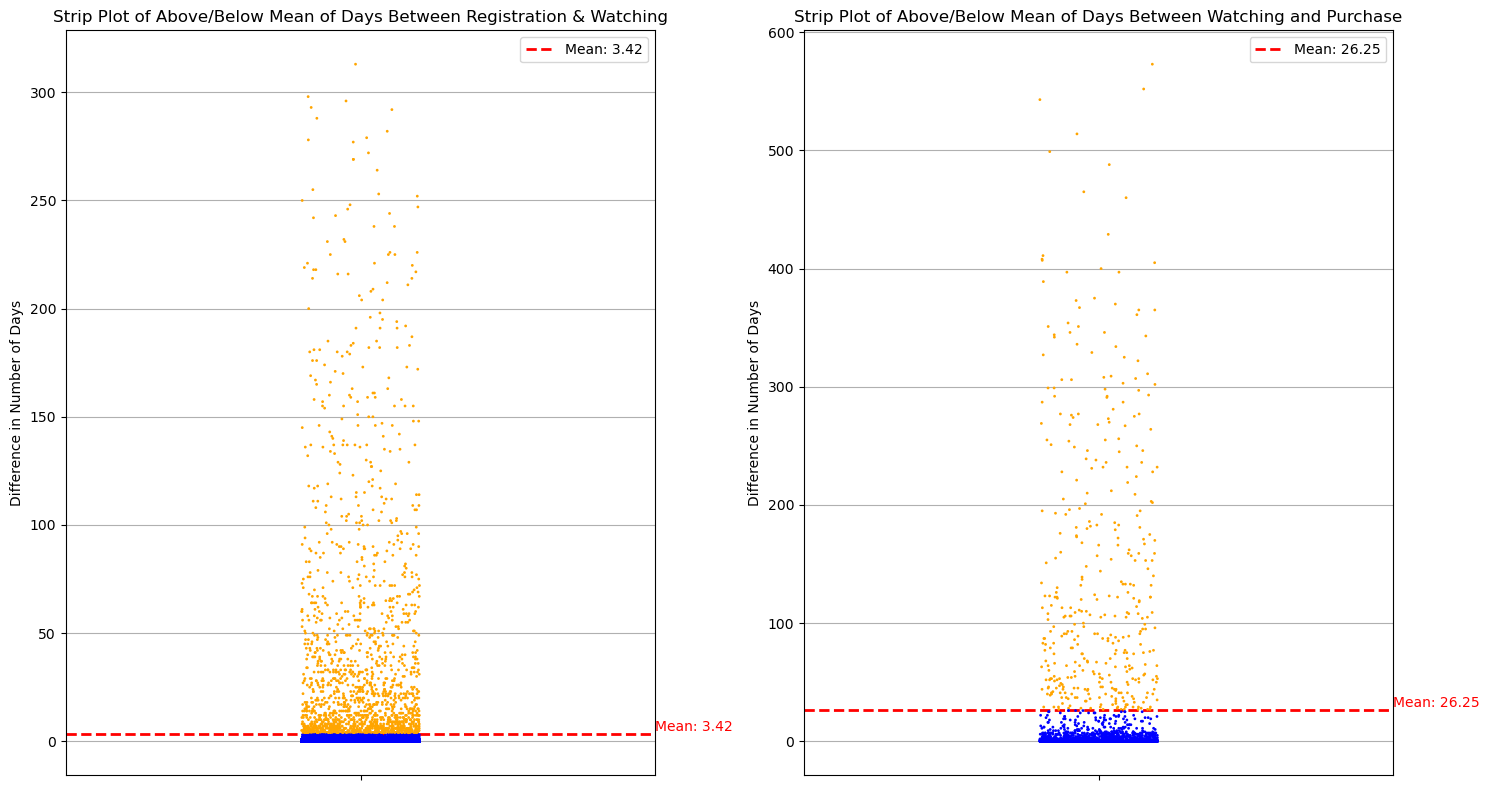

In [127]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# strip plot for date_diff_reg_watch 
above_mean_color = 'orange'
below_mean_color = 'blue'

sns.stripplot(y=con_rate_df['date_diff_reg_watch'], color=[above_mean_color if x > con_rate_df['date_diff_reg_watch'].mean() else below_mean_color for x in con_rate_df['date_diff_reg_watch']], size=2, ax=axs[0])
mean_line_y = con_rate_df['date_diff_reg_watch'].mean()
axs[0].axhline(mean_line_y, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_line_y:.2f}')
axs[0].text(0.5, mean_line_y, f'Mean: {mean_line_y:.2f}', color='red', ha='left', va='bottom')
axs[0].set_title('Strip Plot of Above/Below Mean of Days Between Registration & Watching')
axs[0].set_ylabel('Difference in Number of Days')
axs[0].legend()
axs[0].grid(axis='y')  

# strip plot for date_diff_watch_purchase 
sns.stripplot(y=filtered_df['date_diff_watch_purchase'], color=[above_mean_color if x > filtered_df['date_diff_watch_purchase'].mean() else below_mean_color for x in filtered_df['date_diff_watch_purchase']], size=2, ax=axs[1])
mean_line_y = filtered_df['date_diff_watch_purchase'].mean()
axs[1].axhline(mean_line_y, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_line_y:.2f}')
axs[1].text(0.5, mean_line_y, f'Mean: {mean_line_y:.2f}', color='red', ha='left', va='bottom')
axs[1].set_title('Strip Plot of Above/Below Mean of Days Between Watching and Purchase')
axs[1].set_ylabel('Difference in Number of Days')
axs[1].legend()
axs[1].grid(axis='y')  

# Save the subplots as a PNG file
plt.savefig('stripplot_subplots.png', bbox_inches='tight')

# Adjust layout
plt.tight_layout()


Using an alternative view in a plot chart to examine the distribution and identify outliers. Analyzing these intervals provides valuable insights into the user journey, to optimize strategies and elevate the overall user experience 

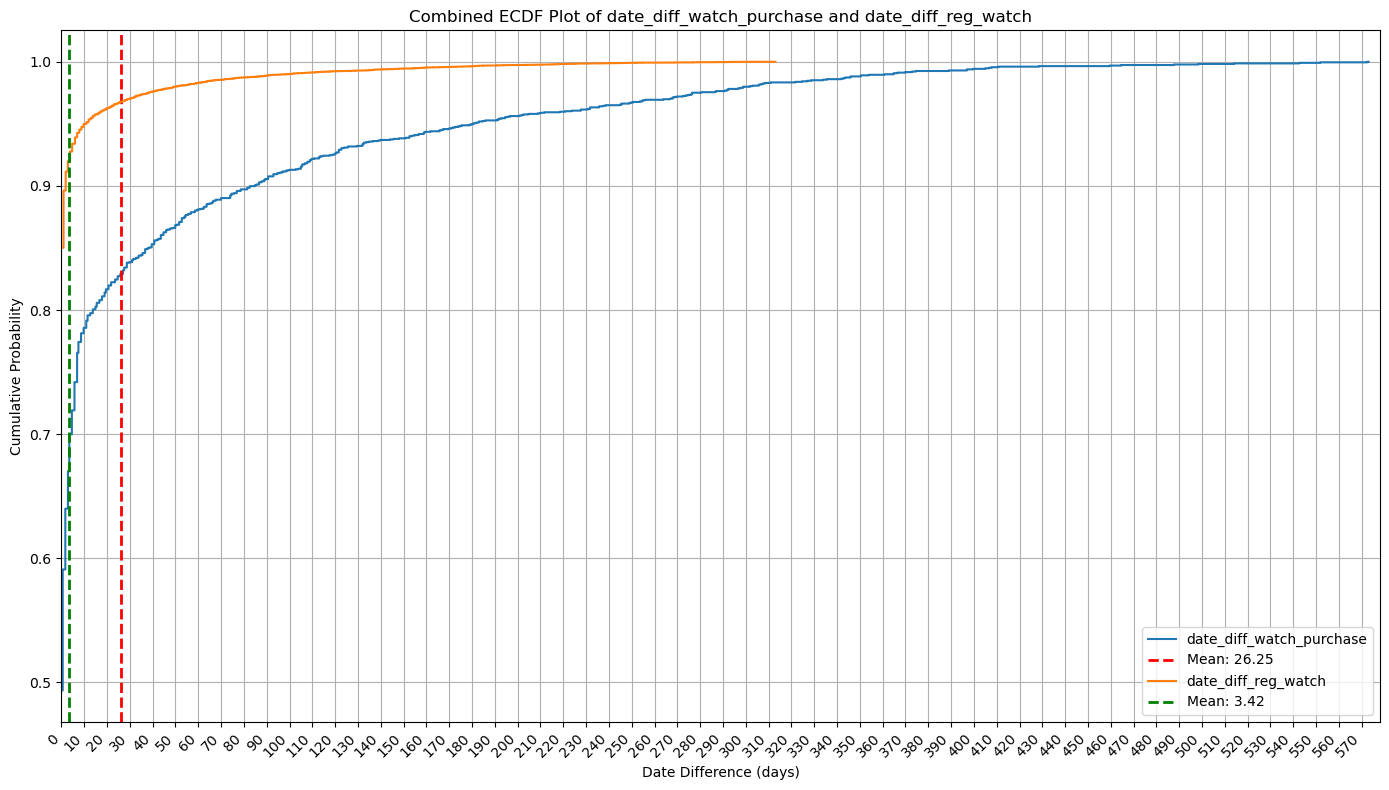

In [33]:
# Creating an ECDF plot for date_diff_watch_purchase
ecdf_watch_purchase = sm.distributions.ECDF(filtered_df['date_diff_watch_purchase'])
x_watch_purchase = np.linspace(min(filtered_df['date_diff_watch_purchase']), max(filtered_df['date_diff_watch_purchase']), num=1000)
y_watch_purchase = ecdf_watch_purchase(x_watch_purchase)

# Calculating mean for date_diff_watch_purchase
mean_watch_purchase = np.mean(filtered_df['date_diff_watch_purchase'])

# Creating an ECDF plot for date_diff_reg_watch
ecdf_reg_watch = sm.distributions.ECDF(con_rate_df['date_diff_reg_watch'])
x_reg_watch = np.linspace(min(con_rate_df['date_diff_reg_watch']), max(con_rate_df['date_diff_reg_watch']), num=1000)
y_reg_watch = ecdf_reg_watch(x_reg_watch)

# Calculating mean for date_diff_reg_watch
mean_reg_watch = np.mean(con_rate_df['date_diff_reg_watch'])

# Creating a combined ECDF plot
plt.figure(figsize=(14, 8))

# ECDF for date_diff_watch_purchase
plt.step(x_watch_purchase, y_watch_purchase, label='date_diff_watch_purchase')

# Add mean line for date_diff_watch_purchase
plt.axvline(mean_watch_purchase, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_watch_purchase:.2f}')

# ECDF for date_diff_reg_watch
plt.step(x_reg_watch, y_reg_watch, label='date_diff_reg_watch')

# Add mean line for date_diff_reg_watch
plt.axvline(mean_reg_watch, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_reg_watch:.2f}')

# x-axis ticks and labels
major_ticks = MultipleLocator(10)
plt.gca().xaxis.set_major_locator(major_ticks)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Set the x-axis limits to start at 0
plt.xlim(0, max(max(filtered_df['date_diff_watch_purchase']), max(con_rate_df['date_diff_reg_watch'])) + 5)

plt.title('Combined ECDF Plot of date_diff_watch_purchase and date_diff_reg_watch')
plt.xlabel('Date Difference (days)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.tight_layout()  
plt.show()


The ECDF plot was used to visualize the distinction between registration-to-engagement and engagement-to-purchase. The plot is particularly effective in highlighting the difference in means and illustrating the time taken to reach 100%.  

### Interpretation

While an 11% convergence rate might seem low, it could be attributed to higher average registration numbers on the platform. Exploring the reasons behind user registrations, whether out of curiosity, field exploration, or other motives, could provide valuable insights. Additionally, investigating specific topics on the platform that lead to higher convergencies might offer valuable information.

Regarding the average duration between registration and first-time watching, most users do so within the first four days. However, there are outliers taking over 200 days to start watching. It would be beneficial to examine the factors influencing re-engagement after a prolonged period and identify what prompts most users to engage quickly after registration.

The engagement-to-purchase duration exceeds 24 days, exhibiting a broader distribution than the previous metric. This might suggest that either more engagement is needed or users are waiting for specific conditions, such as a sale, before deciding to make a purchase.



### Extra Analysis

Another area explored was to look at the overall relationship between registration-to-purchase, to see if there are significant differences between those that registration-to-purchase compared to the convergency rate of engagement-to-purchasing.   

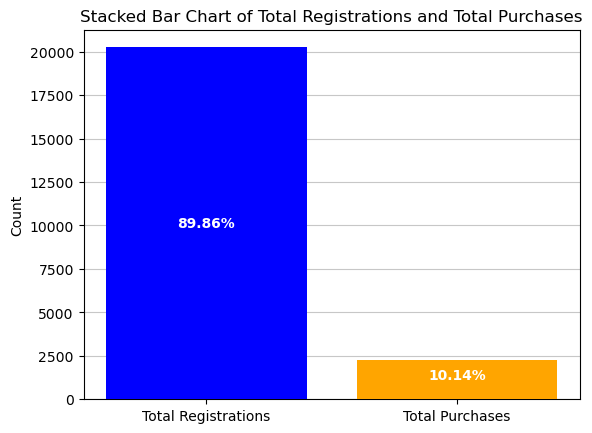

In [115]:
# Calculating total count of registrations and purchases
total_count = total_data.shape[0]
count_registrations = total_data['first_registered_count'].sum()
count_purchases = total_data['Total_Purchases'].sum()

# Calculating percentages based on total sum of registrations and purchases
percentage_registrations = count_registrations / (count_registrations + count_purchases) * 100
percentage_purchases = count_purchases / (count_registrations + count_purchases) * 100

# Create a DataFrame for chart
plot_data = pd.DataFrame({
    'Conversion': ['Total Registrations', 'Total Purchases'],
    'Count': [count_registrations, count_purchases],
    'Percentage': [percentage_registrations, percentage_purchases]
})

# Plot single stacked bar chart
fig, ax = plt.subplots()

# Plot the bars
bar_width = 0.8
bar_0 = ax.bar(plot_data['Conversion'], plot_data['Count'], width=bar_width, color=['blue', 'orange'], zorder=3)

# Add labels and legend
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Chart of Total Registrations and Total Purchases')

# Add gridlines in the background
ax.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)

# Annotate Registrations
plt.annotate(f'{percentage_registrations:.2f}%', 
             xy=(0, count_registrations / 2), 
             xytext=(0, count_registrations / 2), 
             ha='center', 
             va='center',
             color='white',  
             fontweight='bold')

# Annotate Purchases
plt.annotate(f'{percentage_purchases:.2f}%', 
             xy=(1, count_purchases / 2),  
             xytext=(1, 1400), 
             ha='center', 
             va='center',
             color='white',  
             fontweight='bold')
# Save the plot as a PNG file
plt.savefig('reg_puchase.png', bbox_inches='tight')


# Show the plot
plt.show()

The overall registration-to-purchase rate was 10.14% with there only being a 1.15% difference between the engagement-to-purchase conversion rate.   

Continuing to look by month for any noteable differences

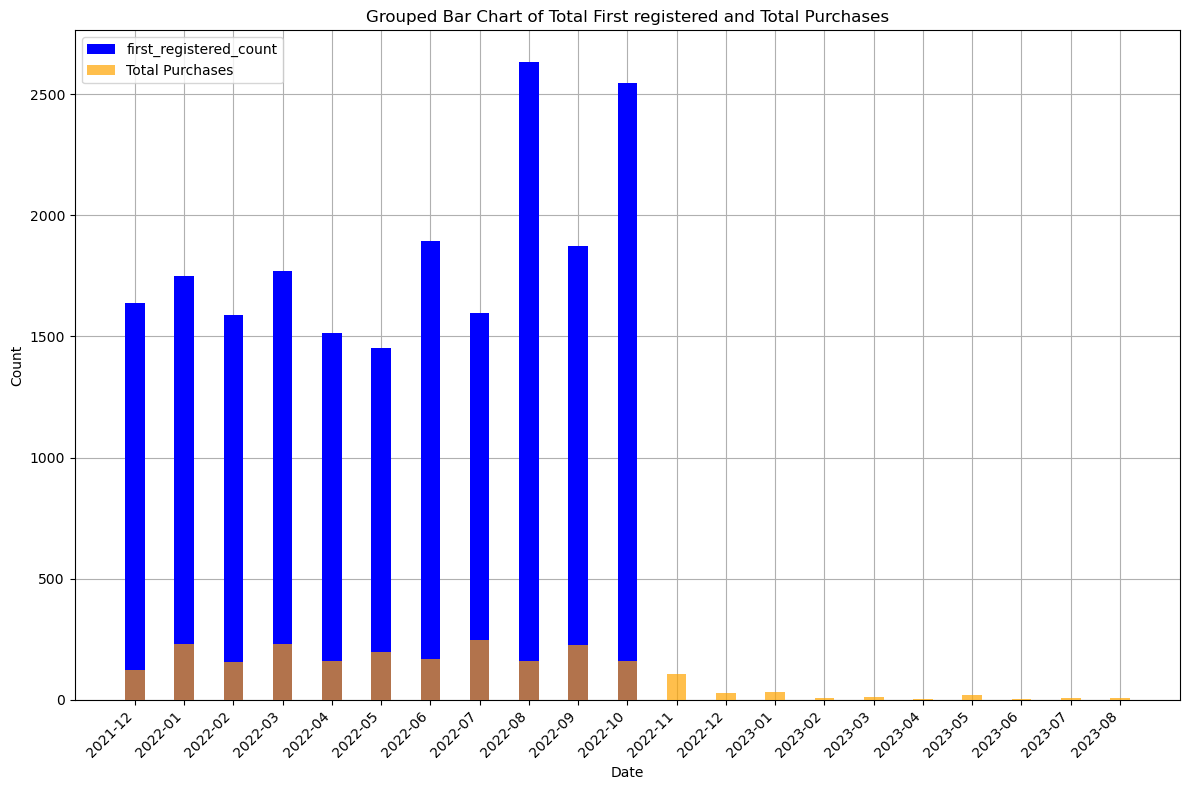

In [117]:
# Drop rows with NaN values
total_data = total_data.dropna(subset=['Total_Purchases', 'first_registered_count'])

# Converting 'month_year_purchased' column to string
total_data['month_year_purchased'] = total_data['month_year_purchased'].astype(str)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Plot total first watches
plt.bar(total_data['month_year_purchased'], total_data['first_registered_count'], width=bar_width, label='first_registered_count', color='blue', zorder=5)

# Plot total purchases
plt.bar(total_data['month_year_purchased'], total_data['Total_Purchases'], width=bar_width, label='Total Purchases', color='orange', alpha=0.7, zorder=5)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of Total First registered and Total Purchases')
plt.legend(loc='upper left')
plt.grid(True) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the chart as a PNG file
plt.savefig('grouped_bar_reg_purchase.png', bbox_inches='tight')

plt.show()


The registration patterns throughout the year, spikes were observed in August and October, indicating significantly higher registration numbers compared to other months.  The months of January, March, July, and September showed elevated purchase figures.  This closely aligns with the patterns observed in first-time user engagements. 

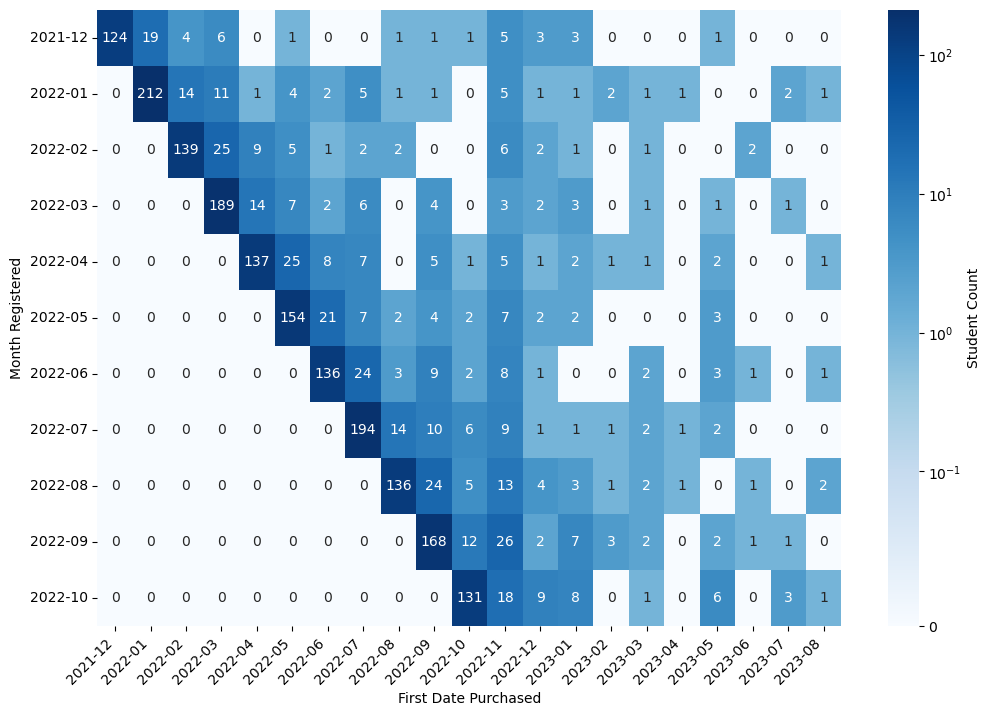

In [49]:
# Converting 'date_registered' 
con_rate_df['month_registered'] = con_rate_df['date_registered'].dt.to_period('M')

# Creating a pivot table for counts with 'month_registered'
pivot_counts = con_rate_df.pivot_table(index='month_registered', columns='month_year_purchased', values='engagement_student_id', aggfunc='count', fill_value=0)

# Creating a heatmap with annotations and adjust color darkness using SymLogNorm
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_counts, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar_kws={'label': 'Student Count'}, 
    norm=mcolors.SymLogNorm(linthresh=0.1, vmin=pivot_counts.values.min(), vmax=pivot_counts.values.max())
)

# x-axis and y-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('First Date Purchased')
plt.ylabel('Month Registered')

# Show the plot
plt.show()


After a review of the months during which users registered and the corresponding months of their purchases reveals a consistent pattern reminiscent of the engagement-to-purchase convergent rates. There are minor distinctions between instances where registrations and purchases do not occur on the same month, which seem insignificant. The subtle variations suggest a level of consistency in user behavior across registration and purchase activities. 

## Project 2: STREAK ANALYSIS 

This project focuses on analyzing student streaks, a significant metric in online education that highlights users' commitment, consistency, and dedication. Streaks, defined as consecutive interactions counted by days, offer crucial insights into user engagement patterns.

The primary objective of the analysis is to identify the most engaged students by calculating their longest streak lengths. The length of a streak increases daily if the user remains active and hasn't manually frozen it. The duration does not extend in the absence of new interactions or when the streak is frozen. Subsequently, the goal is to contact users with the highest streaks to gather additional feedback and insights into their user experiences.

In [109]:
#importing csv for project 2: STREAK ANALYSIS 

# importing streak length and counts
streak_df=pd.read_csv('streak_count_and_length.csv')

# importing activity by day
day_df=pd.read_csv('streak_day_analysis.csv')

# importing activity, inactivity, and day range of activity
activity_pd=pd.read_csv('streak_activity_inactivity.csv')

# relationships between length and freezes
length_freeze_pd=pd.read_csv('streak_freeze_vs_length_heatmap.csv')


### Identifying Most Active Users for Additional Engagements and Feedback

In [66]:
# Filter the DataFrame based on the condition
filtered_df = streak_df[streak_df['max_streak_count'] > 30]

# Extract user IDs that satisfy the condition
user_ids_with_max_streak_gt_30 = filtered_df['user_id'].tolist()

# Print user IDs 
print("User IDs with max_streak_count > 30:", user_ids_with_max_streak_gt_30)

User IDs with max_streak_count > 30: [1200, 16668, 39164, 59568, 149601, 173105, 210670, 219488, 223510, 230273, 235095, 242698, 272510, 278459, 280853, 284482, 291015, 291769, 293951, 295114, 297580, 303504, 314918, 324946, 335656, 348546, 382055, 407874, 408677, 423874, 425458, 425522, 435385, 438873, 442476, 453915]


Exploring the overall distribution of user streaks provides valuable insights into the patterns and trends of user activities, offering a comprehensive perspective.

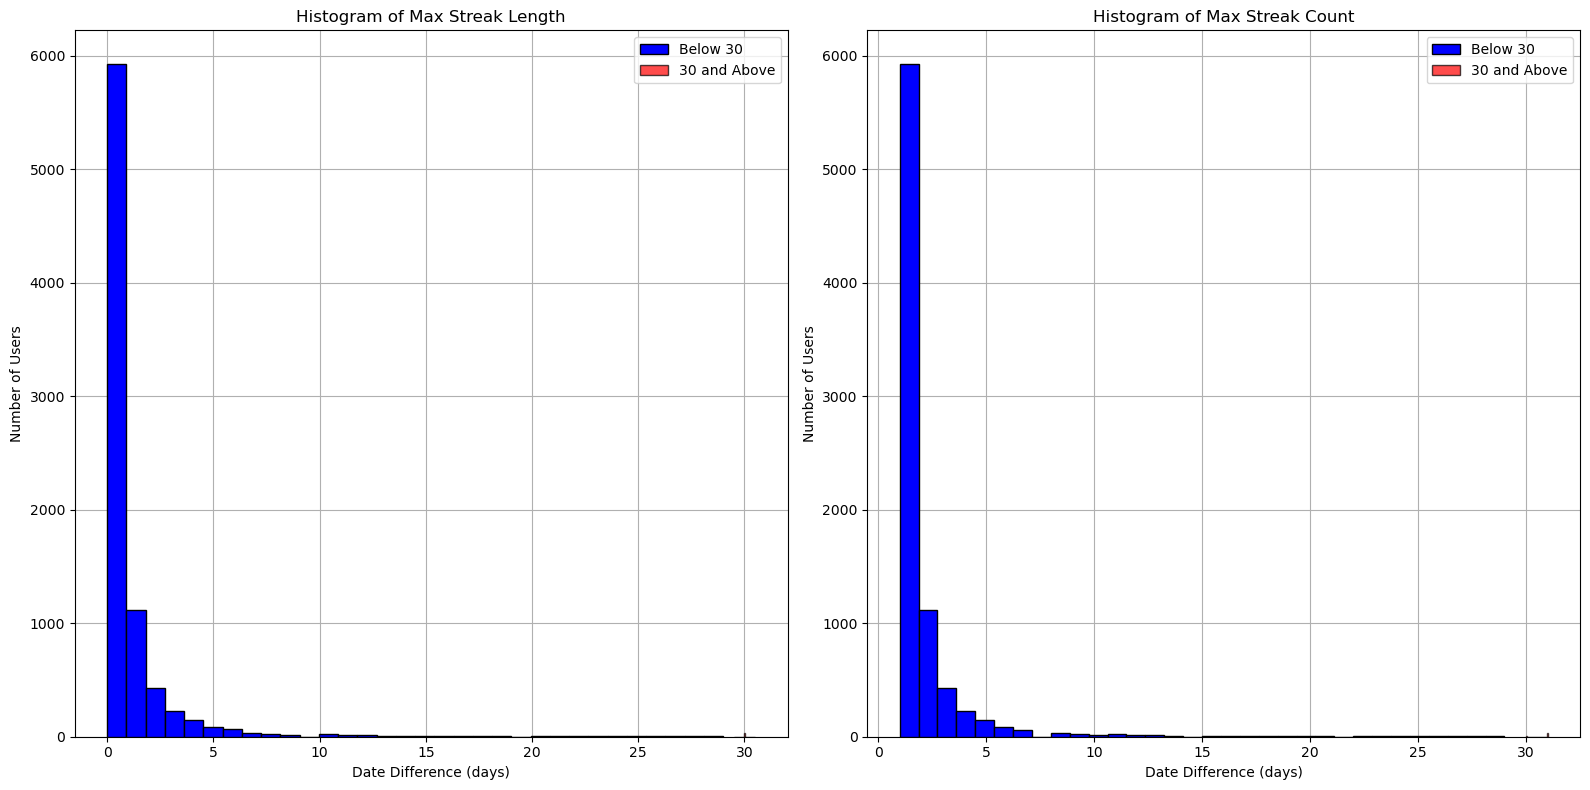

In [123]:
# Creating subplots for max_streak_length and max_streak_count side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# histogram for max_streak_length
below_30_length = streak_df['max_streak_length'][streak_df['max_streak_length'] < 30]
above_30_length = streak_df['max_streak_length'][streak_df['max_streak_length'] >= 30]
axes[0].hist(below_30_length, bins=32, edgecolor='black', color='blue', label='Below 30', zorder=3)
axes[0].hist(above_30_length, bins=32, edgecolor='black', color='red', alpha=0.7, label='30 and Above', zorder=3)
axes[0].set_title('Histogram of Max Streak Length')
axes[0].set_xlabel('Date Difference (days)')
axes[0].set_ylabel('Number of Users')
axes[0].grid(True)
axes[0].legend()


# histogram for max_streak_count
below_30_count = streak_df['max_streak_count'][streak_df['max_streak_count'] < 30]
above_30_count = streak_df['max_streak_count'][streak_df['max_streak_count'] >= 30]
axes[1].hist(below_30_count, bins=32, edgecolor='black', color='blue', label='Below 30', zorder=3)
axes[1].hist(above_30_count, bins=32, edgecolor='black', color='red', alpha=0.7, label='30 and Above', zorder=3)
axes[1].set_title('Histogram of Max Streak Count')
axes[1].set_xlabel('Date Difference (days)')
axes[1].set_ylabel('Number of Users')
axes[1].grid(True)
axes[1].legend()


plt.tight_layout()
plt.show()

The histograms show a notable trend of a steep drop-off after the initial days of use, with most users using the platform for a single day. This observation highlights the need to explore factors contributing to short-term engagement and to strategize how to increase user retention over a more extended period. 

### Additional Analysis

ideas explored

### Examining Associations: Streak Length in Relation to Frozen Streaks

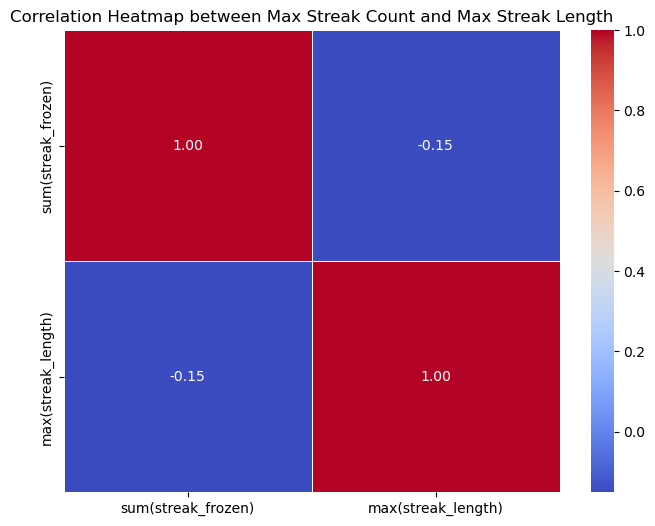

In [124]:
# Calculate the correlation matrix
correlation_matrix = length_freeze_pd[['sum(streak_frozen)', 'max(streak_length)']].corr()
length_freeze_pd
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Max Streak Count and Max Streak Length')

# Save the heatmap as a PNG file
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

plt.show()

For the next step in the analysis, I looked to see the correlation between users' utilization of freezing streaks and the total streak length. While a negative score was observed, suggesting that higher instances of freezing might be associated with lower streak lengths, the relationship is weak.  It's notable that the number of users making use of the freezing streak function was very limited during the monthly sample. Exploring whether other time periods experienced higher usage or considering strategies to encourage users to utilize this function for more consistent usage could provide insights."

### User Activity Patterns Throughout the Week

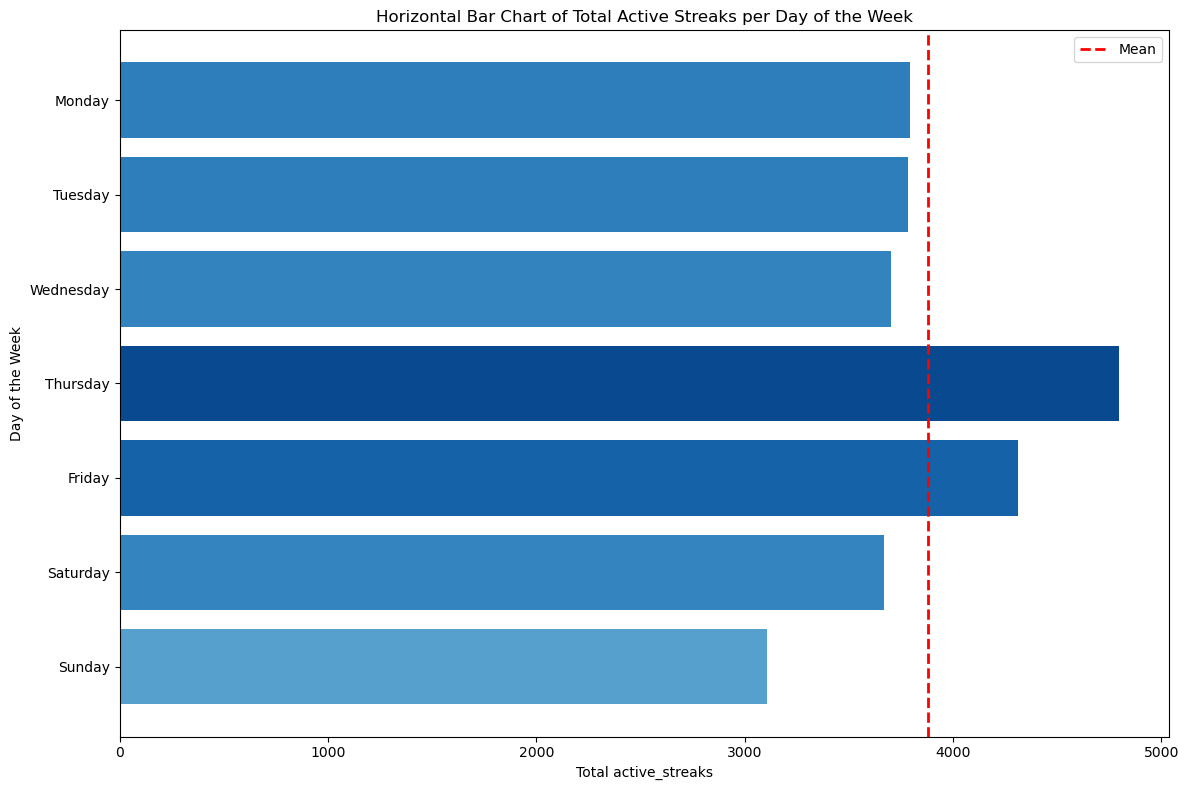

In [57]:
day_of_week_sum = day_df.groupby('day_of_week')['active_streaks'].sum().reset_index()

# Define the order of days of the week
days_order = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

# Aggregate the data by day of the week
day_of_week_sum = day_df.groupby('day_of_week')['active_streaks'].sum().reset_index()

# Reorder the days of the week
day_of_week_sum['day_of_week'] = pd.Categorical(day_of_week_sum['day_of_week'], categories=days_order, ordered=True)
day_of_week_sum = day_of_week_sum.sort_values('day_of_week')

# Define a custom color map with a modified normalization range
norm = mcolors.Normalize(vmin=day_of_week_sum['active_streaks'].min()*.1, vmax=day_of_week_sum['active_streaks'].max()*1.1)
colors = plt.cm.Blues(norm(day_of_week_sum['active_streaks']))

# Creating a horizontal bar chart with switched axes
plt.figure(figsize=(12, 8))
bars = plt.barh(day_of_week_sum['day_of_week'], day_of_week_sum['active_streaks'], color=colors)

# Add a line for the mean/average
mean_value = np.mean(day_of_week_sum['active_streaks'])
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

plt.ylabel('Day of the Week')
plt.xlabel('Total active_streaks')
plt.title('Horizontal Bar Chart of Total Active Streaks per Day of the Week')
plt.legend()
plt.tight_layout()
plt.show()

The results indicate that Thursdays saw the highest usage, followed by Fridays as the second busiest day. Saturdays and Sundays, on the other hand, had the lowest usage.  It is possibly the lower usage is due to users taking a break or having other commitments. Understanding these patterns can help strategies to enhance user engagement and cater to peak activity days.

### User Engagement Across the Month

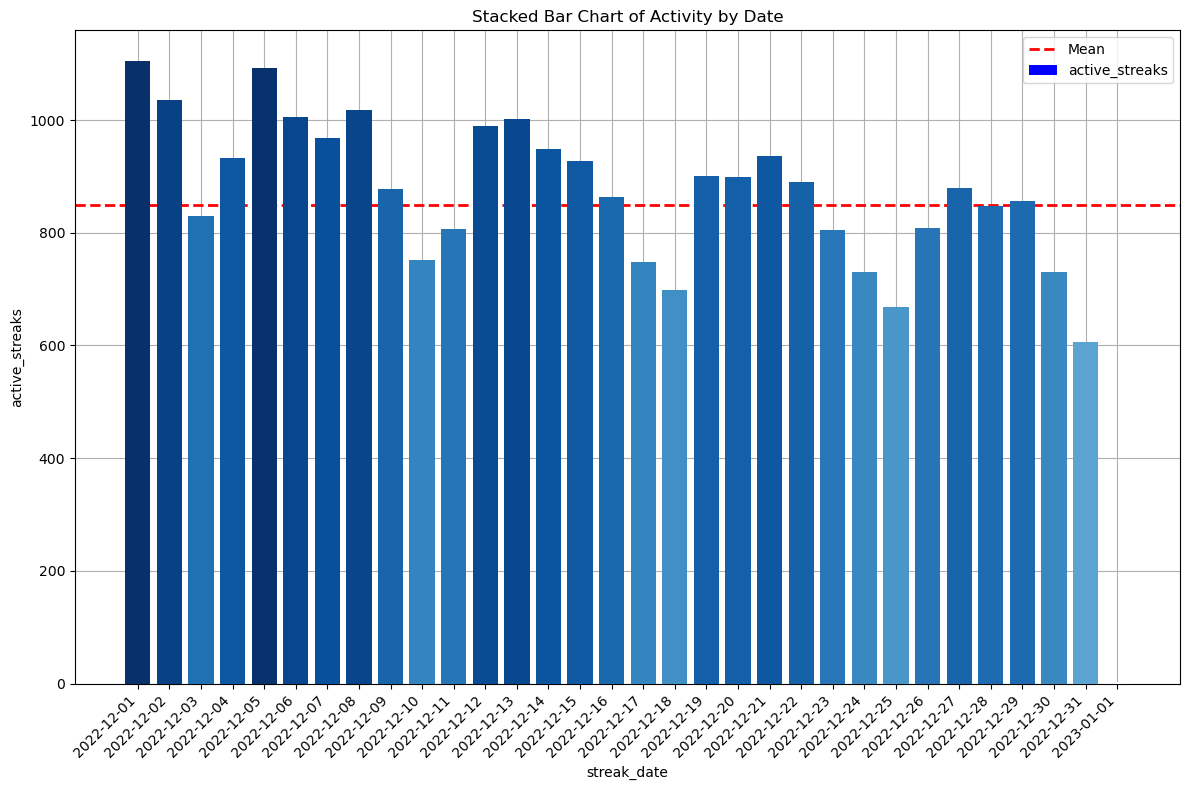

In [125]:
# Creating a custom color map based on active_streaks values
norm = mcolors.Normalize(vmin=day_df['active_streaks'].min(), vmax=day_df['active_streaks'].max())
colors = plt.cm.Blues(norm(day_df['active_streaks']))

plt.figure(figsize=(12, 8))
plt.bar(day_df['streak_date'], day_df['active_streaks'], label='active_streaks', color='blue')

# Assign colors and create bars
bars = plt.bar(day_df['streak_date'], day_df['active_streaks'], color=colors, zorder=3)

mean_value = np.mean(day_df['active_streaks'])
plt.axhline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

plt.xlabel('streak_date')
plt.ylabel('active_streaks')
plt.title('Stacked Bar Chart of Activity by Date')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True) 

# Save the stacked bar chart as a PNG file
plt.savefig('stacked_bar_chart.png', bbox_inches='tight')

plt.show()

The analysis of the month's activity shows user activity peaks at the beginning of the month, gradually tapering off towards the end. This decline may be influenced by the data collection period in December, ending with two holidays, leading to the lowest usage on 12/25 and 12/31. Additionally, a consistent trend of reduced activity on weekends is observed, with Thursdays and Fridays being the most active days of the week 

### User Activity Duration, Total Interactions, and Inactivity Overview

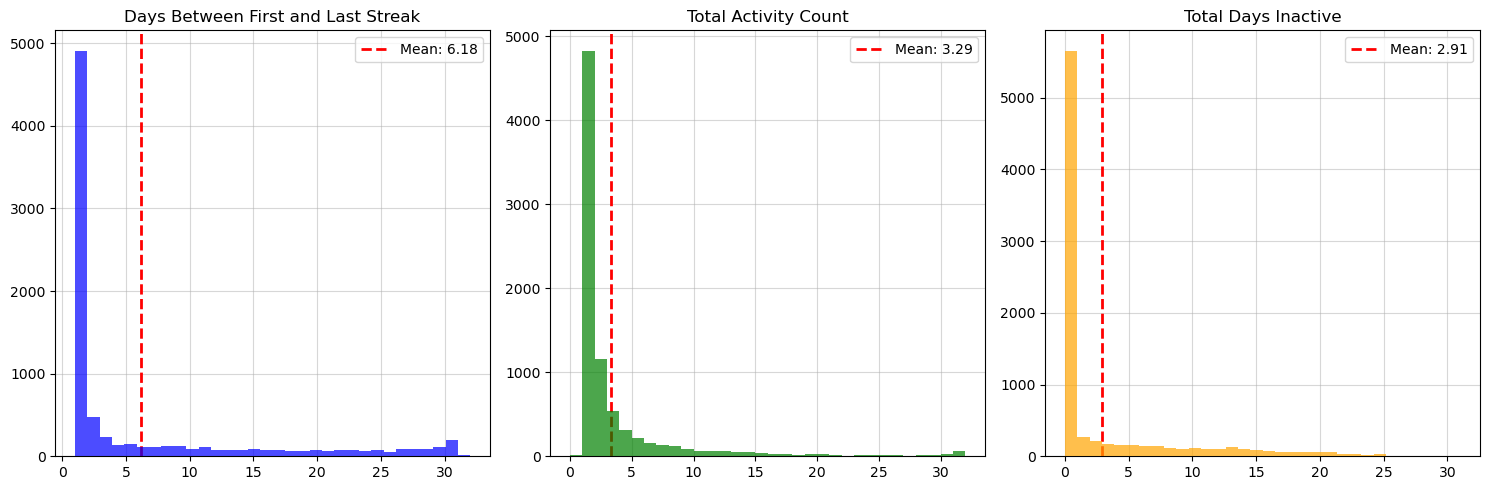

In [130]:
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# histogram for days_between_first_last_streak
axes[0].hist(activity_pd['days_between_first_last_streak'], bins=32, color='blue', alpha=0.7, zorder=3)
axes[0].set_title('Days Between First and Last Streak')
axes[0].grid(True, linestyle='-', alpha=0.5, zorder=0) 

# Annotate mean value
mean_1 = np.mean(activity_pd['days_between_first_last_streak'])
axes[0].axvline(mean_1, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_1:.2f}')
axes[0].legend()

# histogram for total_activity_count
axes[1].hist(activity_pd['total_activity_count'], bins=32, color='green', alpha=0.7, zorder=3)
axes[1].set_title('Total Activity Count')
axes[1].grid(True, linestyle='-', alpha=0.5, zorder=0) 

# Annotate mean value
mean_2 = np.mean(activity_pd['total_activity_count'])
axes[1].axvline(mean_2, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_2:.2f}')
axes[1].legend()

# histogram for total_days_inactive
axes[2].hist(activity_pd['total_days_inactive'], bins=32, color='orange', alpha=0.7, zorder=3)
axes[2].set_title('Total Days Inactive')
axes[2].grid(True, linestyle='-', alpha=0.5, zorder=0)

# Annotate mean value
mean_3 = np.mean(activity_pd['total_days_inactive'])
axes[2].axvline(mean_3, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_3:.2f}')
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Save the subplots as a PNG file
plt.savefig('subplots_histograms.png', bbox_inches='tight')

# Show the plot
plt.show()

These results highlight the differences in engagement patterns of users, with a considerable proportion only engaging in short-term activity. The stable period in the middle of streak durations and the slight increase towards the end may warrant further investigation into factors influencing sustained engagement. Additionally, addressing the sharp decline in total days of inactivity could be crucial for user retention and overall platform engagement. 